In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras import Model
import tensorflow.keras.backend as K
from keras.layers import Conv2D,MaxPool2D,concatenate,AveragePooling2D,GlobalAveragePooling2D,Flatten,ZeroPadding2D,BatchNormalization,Dense,ZeroPadding2D,Activation,ReLU,Input
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from keras.preprocessing import image
gpus=tf.config.experimental.list_physical_devices('GPU') 
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [2]:
#Importing Data
train_dir=r'C:\Users\ritan\Desktop\Maths for ML\Groundnut FD\Dataset\Train'
test_dir=r'C:\Users\ritan\Desktop\Maths for ML\Groundnut FD\Dataset\Test'
valid_dir=r'C:\Users\ritan\Desktop\Maths for ML\Groundnut FD\Dataset\Valid'

In [3]:
#Rescaling and augmentation of data
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(224,224,3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
],name="data_augmentation")

In [4]:
IMG_SIZE=(224,224)
BATCH_SIZE=5
training_set=tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    image_size=IMG_SIZE,
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True
)
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    directory = test_dir,
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

validation_set = tf.keras.preprocessing.image_dataset_from_directory(
    directory = valid_dir,
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size=BATCH_SIZE,
)
class_names=validation_set.class_names

Found 1376 files belonging to 5 classes.
Found 172 files belonging to 5 classes.
Found 172 files belonging to 5 classes.


In [5]:
def DenseNet201(input_shape=(224,224,3),classes=5,filters=32):
    def conv(x,filters,kernel=1,strides=1):
        x=BatchNormalization()(x)
        x=ReLU()(x)
        x=Conv2D(filters,kernel,strides=strides,padding='same')
        return x
    def dense_block(x,repetition,filters):
        for i in range(repetition):
            y=conv(x,4*filters)(x)
            y=conv(y,filters,3)(y)
            x=concatenate([y,x])
        return x
    def transition_layer(x):
        x=conv(x,K.int_shape(x)[-1]//2)(x)
        x=AveragePooling2D(2,strides=2,padding='same')(x)
        return x
    x_input=Input(input_shape)
    x=Conv2D(64,7,strides=2,padding='same')(x_input)
    x=MaxPool2D(3,strides=2,padding='same')(x)
    for repetition in [6,12,48,32]:
        d=dense_block(x,repetition,filters)
        x=transition_layer(d)
    x=GlobalAveragePooling2D()(d)
    x=Dense(units=classes,activation='softmax')(x)
    
    model=Model(inputs=x_input,outputs=x,name='DenseNet201')
    
    return model

In [6]:
model=DenseNet201(input_shape=(224,224,3),classes=5)

In [7]:
model.summary()

Model: "DenseNet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 56, 56, 64)   0           ['conv2d[0][0]']                 
                                                                                        

 concatenate_9 (Concatenate)    (None, 28, 28, 256)  0           ['conv2d_21[0][0]',              
                                                                  'concatenate_8[0][0]']          
                                                                                                  
 conv2d_22 (Conv2D)             (None, 28, 28, 128)  32896       ['concatenate_9[0][0]']          
                                                                                                  
 conv2d_23 (Conv2D)             (None, 28, 28, 32)   36896       ['conv2d_22[0][0]']              
                                                                                                  
 concatenate_10 (Concatenate)   (None, 28, 28, 288)  0           ['conv2d_23[0][0]',              
                                                                  'concatenate_9[0][0]']          
                                                                                                  
 conv2d_24

                                                                  'concatenate_19[0][0]']         
                                                                                                  
 conv2d_45 (Conv2D)             (None, 14, 14, 128)  45184       ['concatenate_20[0][0]']         
                                                                                                  
 conv2d_46 (Conv2D)             (None, 14, 14, 32)   36896       ['conv2d_45[0][0]']              
                                                                                                  
 concatenate_21 (Concatenate)   (None, 14, 14, 384)  0           ['conv2d_46[0][0]',              
                                                                  'concatenate_20[0][0]']         
                                                                                                  
 conv2d_47 (Conv2D)             (None, 14, 14, 128)  49280       ['concatenate_21[0][0]']         
          

 concatenate_32 (Concatenate)   (None, 14, 14, 736)  0           ['conv2d_68[0][0]',              
                                                                  'concatenate_31[0][0]']         
                                                                                                  
 conv2d_69 (Conv2D)             (None, 14, 14, 128)  94336       ['concatenate_32[0][0]']         
                                                                                                  
 conv2d_70 (Conv2D)             (None, 14, 14, 32)   36896       ['conv2d_69[0][0]']              
                                                                                                  
 concatenate_33 (Concatenate)   (None, 14, 14, 768)  0           ['conv2d_70[0][0]',              
                                                                  'concatenate_32[0][0]']         
                                                                                                  
 conv2d_71

                                                                                                  
 concatenate_44 (Concatenate)   (None, 14, 14, 1120  0           ['conv2d_92[0][0]',              
                                )                                 'concatenate_43[0][0]']         
                                                                                                  
 conv2d_93 (Conv2D)             (None, 14, 14, 128)  143488      ['concatenate_44[0][0]']         
                                                                                                  
 conv2d_94 (Conv2D)             (None, 14, 14, 32)   36896       ['conv2d_93[0][0]']              
                                                                                                  
 concatenate_45 (Concatenate)   (None, 14, 14, 1152  0           ['conv2d_94[0][0]',              
                                )                                 'concatenate_44[0][0]']         
          

 conv2d_116 (Conv2D)            (None, 14, 14, 32)   36896       ['conv2d_115[0][0]']             
                                                                                                  
 concatenate_56 (Concatenate)   (None, 14, 14, 1504  0           ['conv2d_116[0][0]',             
                                )                                 'concatenate_55[0][0]']         
                                                                                                  
 conv2d_117 (Conv2D)            (None, 14, 14, 128)  192640      ['concatenate_56[0][0]']         
                                                                                                  
 conv2d_118 (Conv2D)            (None, 14, 14, 32)   36896       ['conv2d_117[0][0]']             
                                                                                                  
 concatenate_57 (Concatenate)   (None, 14, 14, 1536  0           ['conv2d_118[0][0]',             
          

                                                                                                  
 concatenate_67 (Concatenate)   (None, 7, 7, 960)    0           ['conv2d_139[0][0]',             
                                                                  'concatenate_66[0][0]']         
                                                                                                  
 conv2d_140 (Conv2D)            (None, 7, 7, 128)    123008      ['concatenate_67[0][0]']         
                                                                                                  
 conv2d_141 (Conv2D)            (None, 7, 7, 32)     36896       ['conv2d_140[0][0]']             
                                                                                                  
 concatenate_68 (Concatenate)   (None, 7, 7, 992)    0           ['conv2d_141[0][0]',             
                                                                  'concatenate_67[0][0]']         
          

 conv2d_163 (Conv2D)            (None, 7, 7, 32)     36896       ['conv2d_162[0][0]']             
                                                                                                  
 concatenate_79 (Concatenate)   (None, 7, 7, 1344)   0           ['conv2d_163[0][0]',             
                                                                  'concatenate_78[0][0]']         
                                                                                                  
 conv2d_164 (Conv2D)            (None, 7, 7, 128)    172160      ['concatenate_79[0][0]']         
                                                                                                  
 conv2d_165 (Conv2D)            (None, 7, 7, 32)     36896       ['conv2d_164[0][0]']             
                                                                                                  
 concatenate_80 (Concatenate)   (None, 7, 7, 1376)   0           ['conv2d_165[0][0]',             
          

                                                                                                  
 conv2d_187 (Conv2D)            (None, 7, 7, 32)     36896       ['conv2d_186[0][0]']             
                                                                                                  
 concatenate_91 (Concatenate)   (None, 7, 7, 1728)   0           ['conv2d_187[0][0]',             
                                                                  'concatenate_90[0][0]']         
                                                                                                  
 conv2d_188 (Conv2D)            (None, 7, 7, 128)    221312      ['concatenate_91[0][0]']         
                                                                                                  
 conv2d_189 (Conv2D)            (None, 7, 7, 32)     36896       ['conv2d_188[0][0]']             
                                                                                                  
 concatena

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint
#Checkpoint to save the best model per epoch
model_path=r'C:\Users\ritan\Desktop\Maths for ML\Groundnut FD\Models\Densenet_Checkpoints\Dense{epoch:02d}-{val_accuracy:.4f}.hdf5'
checkpoint=ModelCheckpoint(
    filepath=model_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#model.fit(x=training_set,validation_data=validation_set,epochs=15,batch_size=5)

In [10]:
#Training the model
history=model.fit(
    training_set,
    epochs=200,
    validation_data=test_set,
    batch_size=5,
    callbacks=[checkpoint],
)

Epoch 1/200
276/276 [==============================] - ETA: 0s - loss: 261954.2500 - accuracy: 0.3532
Epoch 1: val_loss improved from inf to 232.16656, saving model to C:\Users\ritan\Desktop\Maths for ML\Groundnut FD\Models\Densenet_Checkpoints\Dense01-0.2791.hdf5
276/276 [==============================] - 253s 464ms/step - loss: 261954.2500 - accuracy: 0.3532 - val_loss: 232.1666 - val_accuracy: 0.2791
Epoch 2/200
276/276 [==============================] - ETA: 0s - loss: 117.4352 - accuracy: 0.4484
Epoch 2: val_loss improved from 232.16656 to 68.71246, saving model to C:\Users\ritan\Desktop\Maths for ML\Groundnut FD\Models\Densenet_Checkpoints\Dense02-0.5000.hdf5
276/276 [==============================] - 49s 174ms/step - loss: 117.4352 - accuracy: 0.4484 - val_loss: 68.7125 - val_accuracy: 0.5000
Epoch 3/200
276/276 [==============================] - ETA: 0s - loss: 90.3976 - accuracy: 0.4462
Epoch 3: val_loss improved from 68.71246 to 48.56048, saving model to C:\Users\ritan\Deskto

Epoch 27/200
276/276 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2616
Epoch 27: val_loss did not improve from 12.28483
276/276 [==============================] - 47s 165ms/step - loss: nan - accuracy: 0.2616 - val_loss: nan - val_accuracy: 0.2616
Epoch 28/200
276/276 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2616
Epoch 28: val_loss did not improve from 12.28483
276/276 [==============================] - 47s 164ms/step - loss: nan - accuracy: 0.2616 - val_loss: nan - val_accuracy: 0.2616
Epoch 29/200
276/276 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2616
Epoch 29: val_loss did not improve from 12.28483
276/276 [==============================] - 47s 165ms/step - loss: nan - accuracy: 0.2616 - val_loss: nan - val_accuracy: 0.2616
Epoch 30/200
276/276 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2616
Epoch 30: val_loss did not improve from 12.28483
276/276 [==============================]

276/276 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2616
Epoch 57: val_loss did not improve from 12.28483
276/276 [==============================] - 47s 166ms/step - loss: nan - accuracy: 0.2616 - val_loss: nan - val_accuracy: 0.2616
Epoch 58/200
276/276 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2616
Epoch 58: val_loss did not improve from 12.28483
276/276 [==============================] - 47s 166ms/step - loss: nan - accuracy: 0.2616 - val_loss: nan - val_accuracy: 0.2616
Epoch 59/200
276/276 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2616
Epoch 59: val_loss did not improve from 12.28483
276/276 [==============================] - 47s 165ms/step - loss: nan - accuracy: 0.2616 - val_loss: nan - val_accuracy: 0.2616
Epoch 60/200
276/276 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2616
Epoch 60: val_loss did not improve from 12.28483
276/276 [==============================] - 47s 165ms/

276/276 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2616
Epoch 87: val_loss did not improve from 12.28483
276/276 [==============================] - 47s 165ms/step - loss: nan - accuracy: 0.2616 - val_loss: nan - val_accuracy: 0.2616
Epoch 88/200
276/276 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2616
Epoch 88: val_loss did not improve from 12.28483
276/276 [==============================] - 47s 165ms/step - loss: nan - accuracy: 0.2616 - val_loss: nan - val_accuracy: 0.2616
Epoch 89/200
276/276 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2616
Epoch 89: val_loss did not improve from 12.28483
276/276 [==============================] - 47s 167ms/step - loss: nan - accuracy: 0.2616 - val_loss: nan - val_accuracy: 0.2616
Epoch 90/200
276/276 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2616
Epoch 90: val_loss did not improve from 12.28483
276/276 [==============================] - 48s 170ms/

276/276 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2616
Epoch 117: val_loss did not improve from 12.28483
276/276 [==============================] - 48s 168ms/step - loss: nan - accuracy: 0.2616 - val_loss: nan - val_accuracy: 0.2616
Epoch 118/200
276/276 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2616
Epoch 118: val_loss did not improve from 12.28483
276/276 [==============================] - 49s 174ms/step - loss: nan - accuracy: 0.2616 - val_loss: nan - val_accuracy: 0.2616
Epoch 119/200
276/276 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2616
Epoch 119: val_loss did not improve from 12.28483
276/276 [==============================] - 46s 164ms/step - loss: nan - accuracy: 0.2616 - val_loss: nan - val_accuracy: 0.2616
Epoch 120/200
276/276 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2616
Epoch 120: val_loss did not improve from 12.28483
276/276 [==============================] - 46s

Epoch 147/200
276/276 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2616
Epoch 147: val_loss did not improve from 12.28483
276/276 [==============================] - 47s 165ms/step - loss: nan - accuracy: 0.2616 - val_loss: nan - val_accuracy: 0.2616
Epoch 148/200
276/276 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2616
Epoch 148: val_loss did not improve from 12.28483
276/276 [==============================] - 47s 165ms/step - loss: nan - accuracy: 0.2616 - val_loss: nan - val_accuracy: 0.2616
Epoch 149/200
276/276 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2616
Epoch 149: val_loss did not improve from 12.28483
276/276 [==============================] - 47s 165ms/step - loss: nan - accuracy: 0.2616 - val_loss: nan - val_accuracy: 0.2616
Epoch 150/200
276/276 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2616
Epoch 150: val_loss did not improve from 12.28483
276/276 [=======================

Epoch 177/200
276/276 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2616
Epoch 177: val_loss did not improve from 12.28483
276/276 [==============================] - 47s 165ms/step - loss: nan - accuracy: 0.2616 - val_loss: nan - val_accuracy: 0.2616
Epoch 178/200
276/276 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2616
Epoch 178: val_loss did not improve from 12.28483
276/276 [==============================] - 47s 168ms/step - loss: nan - accuracy: 0.2616 - val_loss: nan - val_accuracy: 0.2616
Epoch 179/200
276/276 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2616
Epoch 179: val_loss did not improve from 12.28483
276/276 [==============================] - 49s 172ms/step - loss: nan - accuracy: 0.2616 - val_loss: nan - val_accuracy: 0.2616
Epoch 180/200
276/276 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2616
Epoch 180: val_loss did not improve from 12.28483
276/276 [=======================

In [12]:
from tensorflow.keras.models import Model,load_model
model=load_model(r'C:\Users\ritan\Desktop\Maths for ML\Groundnut FD\Models\Densenet_Checkpoints\Dense13-0.6047.hdf5')

In [13]:
ar=np.empty(0)
for im,y in test_set:
    ar=np.append(ar,y)
yt=np.zeros((172,5))
count=0
for i in range(0,172):
    for j in range(5):
        yt[i][j]=ar[count]
        count+=1
yt=tf.convert_to_tensor(yt,dtype=tf.float32)
print(yt)

tf.Tensor(
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]

In [14]:
yp=model.predict(test_set)
arr=np.zeros(yp.shape)
for i in range(yp.shape[0]):
    for j in range(yp.shape[1]):
        c=yp[i].argmax()
        arr[i][c]=1
yp=arr
print(yp)

35/35 [==============================] - 6s 109ms/step
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0

In [15]:
accuracy=accuracy_score(yt,yp)
print('Accuracy=',accuracy)
precision=precision_score(yt,yp,average=None)
print('Precision=',precision[precision.argmax()])
recall=recall_score(yt,yp,average=None)
print('Recall=',recall[recall.argmax()])
f1=f1_score(yt,yp,average=None)
print('F1 Score=',f1[f1.argmax()])

Accuracy= 0.6046511627906976
Precision= 0.8571428571428571
Recall= 1.0
F1 Score= 0.888888888888889


In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

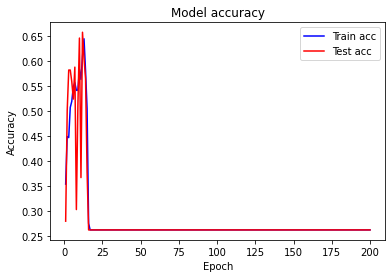

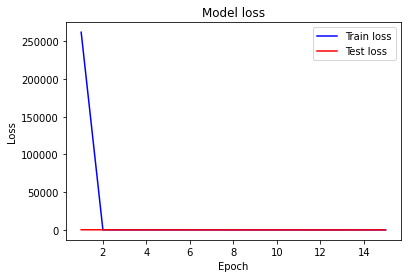

In [17]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Train acc')
plt.plot(epochs, val_acc, 'r', label='Test acc')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Train loss')
plt.plot(epochs, val_loss, 'r', label='Test loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
import numpy as np
from keras.preprocessing import image
test_image=tf.keras.utils.load_img(r'C:\Users\ritan\Desktop\Maths for ML\Groundnut FD\Images for checking\img.jpg',target_size=(224,224))
test_image=tf.keras.utils.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
result=result.flatten()
print(result)
print(class_names)
index=result.argmax()
confidence=result[index]*100;
pred_class=class_names[index]
if pred_class!='Groundnut__Healthy':
    print(f'The disease of the given groundnut leaf is {pred_class} predicted with {confidence} % confidence')
else:
    print(f'The groundnut leaf is healthy predicted with {confidence} % confidence')

1/1 [==============================] - 2s 2s/step
[9.9918884e-01 8.1117853e-04 0.0000000e+00 0.0000000e+00 0.0000000e+00]
['Groundnut__Alternaria__Leafspot', 'Groundnut__Early__Late__Leafspot', 'Groundnut__Healthy', 'Groundnut__Rosette', 'Groundnut__Rust']
The disease of the given groundnut leaf is Groundnut__Alternaria__Leafspot predicted with 99.91888403892517 % confidence
